In [1]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DDPG, TD3
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise


from seagul.plot import smooth_bounded_curve
from seagul.rl.run_utils import load_workspace

/home/sgillen/anaconda3/envs/switched/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/anaconda3/envs/switched/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/anaconda3/envs/switched/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/anaconda3/envs/switched

seagul 92.12724208831787 2.3556063294797056
seagul 87.3868293762207 5.796692142558314


(0, 100)

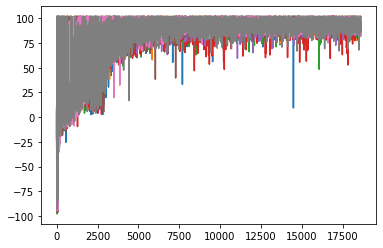

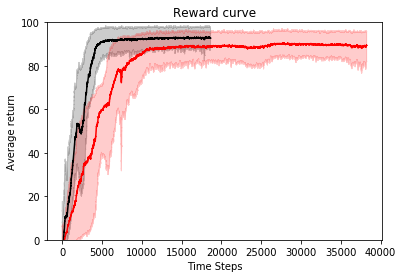

In [32]:
jup_dir = "/home/sgillen/work/"
trial_dir = "seagul/seagul/notebooks/switching/data_needle/50k_slow_longer"
directory = jup_dir + trial_dir

ws_list = []
model_list = []
min_length = float('inf')
for entry in os.scandir(directory):
            model, env, args, ws = load_workspace(entry.path)

            if len(ws["raw_rew_hist"]) < min_length:
                min_length = len(ws["raw_rew_hist"])

            plt.plot(ws["raw_rew_hist"])
            ws_list.append(ws)
            model_list.append(model)

min_length = int(min_length)
rewards = np.zeros((min_length, len(ws_list)))
for i,ws in enumerate(ws_list):
    rewards[:,i] = np.array(ws["raw_rew_hist"][:min_length])

print("seagul", rewards[-1,:].mean(), rewards[-1,:].std())
fig, ax = smooth_bounded_curve(rewards)


trial_dir = "seagul/seagul/notebooks/switching/data_needle/vsac_long"
directory = jup_dir + trial_dir

ws_list = []
model_list = []
min_length = float('inf')
for entry in os.scandir(directory):
            model, env, args, ws = load_workspace(entry.path)

            if len(ws["raw_rew_hist"]) < min_length:
                min_length = len(ws["raw_rew_hist"])

            ws_list.append(ws)
            model_list.append(model)

min_length = int(min_length)
rewards = np.zeros((min_length, len(ws_list)))
for i,ws in enumerate(ws_list):
    rewards[:,i] = np.array(ws["raw_rew_hist"][:min_length])

print("seagul", rewards[-1,:].mean(), rewards[-1,:].std())
fig, ax = smooth_bounded_curve(rewards, ax=ax, color='r')

ax.set_ylim(0,100)
#fig, ax = plt.subplots(1)

seagul 92.12724208831787 2.3556063294797056
seagul 87.3868293762207 5.796692142558314
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/ddpg did not work
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/sac
None 73.00409425 11.412167695809707
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/ppo2
None 0.43400725000000007 8.896866537733564
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/trpo
None 17.6178485 3.3901010535617897
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/a2c
None 2.580488 3.638731659204
/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/td3
None 78.67132425 6.185107140066385


(60, 100)

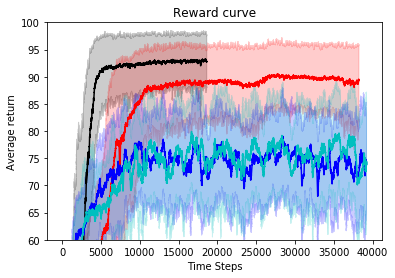

In [3]:
jup_dir = "/home/sgillen/work/"
trial_dir = "seagul/seagul/notebooks/switching/data_needle/50k_slow_longer"
directory = jup_dir + trial_dir

ws_list = []
model_list = []
min_length = float('inf')
for entry in os.scandir(directory):
            model, env, args, ws = load_workspace(entry.path)

            if len(ws["raw_rew_hist"]) < min_length:
                min_length = len(ws["raw_rew_hist"])

            ws_list.append(ws)
            model_list.append(model)

min_length = int(min_length)
rewards = np.zeros((min_length, len(ws_list)))
for i,ws in enumerate(ws_list):
    rewards[:,i] = np.array(ws["raw_rew_hist"][:min_length])

print("seagul", rewards[-1,:].mean(), rewards[-1,:].std())
fig, ax = smooth_bounded_curve(rewards)


trial_dir = "seagul/seagul/notebooks/switching/data_needle/vsac_long"
directory = jup_dir + trial_dir

ws_list = []
model_list = []
min_length = float('inf')
for entry in os.scandir(directory):
            model, env, args, ws = load_workspace(entry.path)

            if len(ws["raw_rew_hist"]) < min_length:
                min_length = len(ws["raw_rew_hist"])

            ws_list.append(ws)
            model_list.append(model)

min_length = int(min_length)
rewards = np.zeros((min_length, len(ws_list)))
for i,ws in enumerate(ws_list):
    rewards[:,i] = np.array(ws["raw_rew_hist"][:min_length])

print("seagul", rewards[-1,:].mean(), rewards[-1,:].std())
fig, ax = smooth_bounded_curve(rewards, ax=ax, color='r')

#fig, ax = plt.subplots(1)


color_iter = iter(['b','g','y','m','c'])
log_dir = '/home/sgillen/work/external/rl-baselines-zoo/baseline_log2/'
for algo in os.scandir(log_dir):
    try:
        df_list = []
        min_length = float('inf')

        for entry in os.scandir(algo.path):
            df = load_results(entry.path)

            if len(df['r']) < min_length:
                min_length = len(df['r'])

            df_list.append(df)

        min_length = int(min_length)
        rewards = np.zeros((min_length, len(df_list)))

        for i,df in enumerate(df_list):
            rewards[:,i] = np.array(df ['r'][:min_length])
            
        print(print(algo.path), rewards[-1,:].mean(), rewards[-1,:].std())
        smooth_bounded_curve(rewards, ax=ax, color=color_iter.__next__())

    except:
        print(algo.path, "did not work")
        
ax.set_ylim(60,100)        
#ax.legend(['ssac', 'sac (ours)', 'sac', 'ppo2', 'trpo', 'a2c', 'td3'])

seagul 700.1741485595703 466.1431943977723


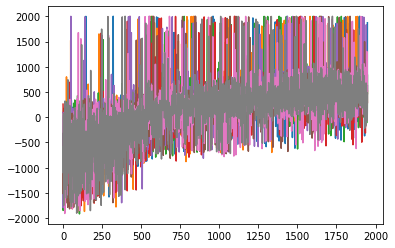

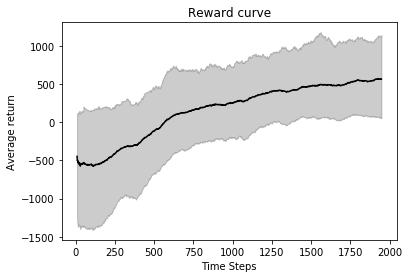

In [4]:
jup_dir = "/home/sgillen/work/"
trial_dir = "seagul/seagul/notebooks/switching/data_needle/rk4_long"
directory = jup_dir + trial_dir

ws_list = []
model_list = []
min_length = float('inf')
for entry in os.scandir(directory):
            model, env, args, ws = load_workspace(entry.path)

            if len(ws["raw_rew_hist"]) < min_length:
                min_length = len(ws["raw_rew_hist"])

            plt.plot(ws["raw_rew_hist"])
            ws_list.append(ws)
            model_list.append(model)

min_length = int(min_length)
rewards = np.zeros((min_length, len(ws_list)))
for i,ws in enumerate(ws_list):
    rewards[:,i] = np.array(ws["raw_rew_hist"][:min_length])

print("seagul", rewards[-1,:].mean(), rewards[-1,:].std())
fig, ax = smooth_bounded_curve(rewards)

